Here's an outline of the steps we'll follow:

- Import the necessary libraries and load the MNIST Fashion Dataset.
- Preprocess the data by normalizing it and splitting it into training and testing sets.
- Build and train the CNN model.
- Evaluate the model's performance on the test set.
- Make predictions on new fashion images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST Fashion Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [2]:
# Reshape and normalize the input images
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


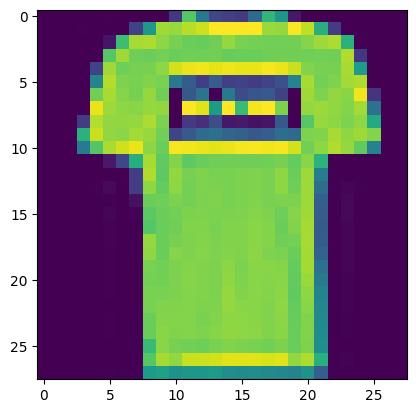

In [7]:
plt.imshow(X_train[1])

In [3]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 64s 133ms/step - loss: 0.6170 - accuracy: 0.7760 - val_loss: 0.4308 - val_accuracy: 0.8444
Epoch 2/10
469/469 [==============================] - 59s 125ms/step - loss: 0.3799 - accuracy: 0.8625 - val_loss: 0.3525 - val_accuracy: 0.8730
Epoch 3/10
469/469 [==============================] - 60s 127ms/step - loss: 0.3239 - accuracy: 0.8829 - val_loss: 0.3627 - val_accuracy: 0.8698
Epoch 4/10
469/469 [==============================] - 58s 125ms/step - loss: 0.2942 - accuracy: 0.8941 - val_loss: 0.3012 - val_accuracy: 0.8916
Epoch 5/10
469/469 [==============================] - 61s 131ms/step - loss: 0.2707 - accuracy: 0.9019 - val_loss: 0.3143 - val_accuracy: 0.8838
Epoch 6/10
469/469 [==============================] - 58s 124ms/step - loss: 0.2517 - accuracy: 0.9083 - val_loss: 0.2867 - val_accuracy: 0.8964
Epoch 7/10
469/469 [==============================] - 63s 133ms/step - loss: 0.2371 - accuracy: 0.9119 - val_loss: 0.2833 - val_ac

In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


313/313 [==============================] - 3s 10ms/step - loss: 0.2582 - accuracy: 0.9069
Loss: 0.25824442505836487
Accuracy: 0.9068999886512756


1/1 [==============================] - 0s 159ms/step


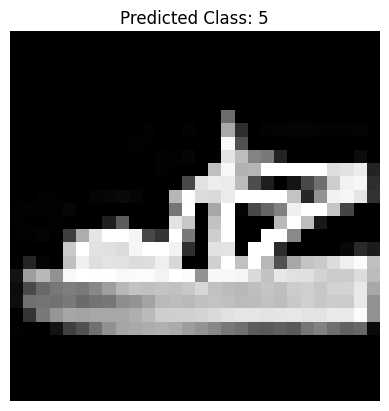

In [5]:
# Select a random fashion image from the test set
index = np.random.randint(0, len(X_test))
image = X_test[index].reshape(1, 28, 28, 1)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title("Predicted Class: {}".format(predicted_class))
plt.axis('off')
plt.show()
